In [1]:
# import libraries
from IPython.core.display import HTML
import pandas as pd
import numpy as np
import math

from scipy.interpolate import interp1d
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
# center all the matplotlib graphs in Jupyter notebook
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# ES1
Nel portale iCorsi, nell’ultima sezione, trovate un dataset salaryData. Il dataset e' molto semplice: ogni istanza dice a quanto corrisponde il salario annuale di un individuo a seconda degli anni di esperienza nel settore in cui lavora (in verita', i numeri non sono molto realistici).

Si chiede di:

(a) Fare uno split del dataset in 70% training set e 30% validation set.

(b) Costruire un regressore lineare su questo training set.

(c) Fare predizioni sul validation set, calcolare il valore di R2 e una metrica di qualita' a scelta (MSE, RMSE, ecc.).

(d) Implementare allo stesso modo una ridge regression con cross-validation sull’iperparametro. Calcolare il nuovo valore di R2
e il nuovo valore della metrica di qualita' scelta (MSE, RMSE, ecc.).



In [3]:
# dataframes
df = pd.read_csv("salaryData.csv", sep=',')

In [4]:
# stampare info sul dataset
# df.describe()
# df.hist(figsize=(15,5))

### (a) Fare uno split del dataset in 70% training set e 30% validation set

In [5]:
# le feature che vogliamo usare per predirre
x_features=['YearsExperience']
y_features=['Salary']

indexes = [df.columns.get_loc(col) for col in x_features]
data_x = df.values[:,indexes]
data_x = data_x.astype(np.float32)

data_y = df[y_features].values
data_y = data_y.astype(np.float32)

In [6]:
# Split train e test
test_portion = 0.3
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=test_portion, random_state=1)

### (b) Costruire un regressore lineare su questo training set
### (c) Fare predizioni sul validation set, calcolare il valore di R2 e una metrica di qualita' a scelta (MSE, RMSE, ecc.)

In [7]:
# Regressione Lineare
# Addestramento di un LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)

# Ottenimento delle predizioni
train_y_predicted = lin_reg.predict(train_x)

# Calcolo del RMSE
rmse = np.sqrt(mean_squared_error(train_y, train_y_predicted))
print(f'Train RMSE: {rmse:.3f}') 

# Ottenimento delle predizioni (test) e calcolo RMSE
test_y_predicted = lin_reg.predict(test_x)
rmse = np.sqrt(mean_squared_error(test_y, test_y_predicted))
print(f'Test RMSE: {rmse:.3f}') 

print(f'R2 score: {lin_reg.score(test_x, test_y):.3f}')

Train RMSE: 5493.919
Test RMSE: 6256.132
R2 score: 0.925


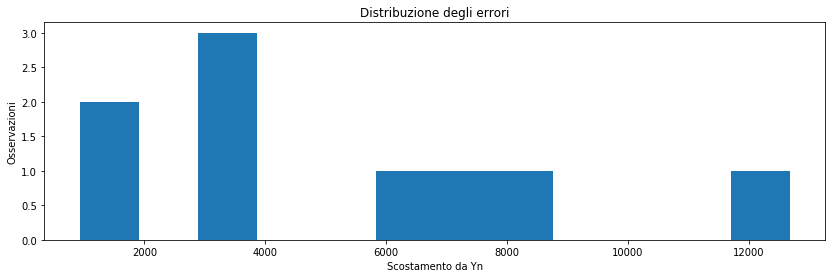

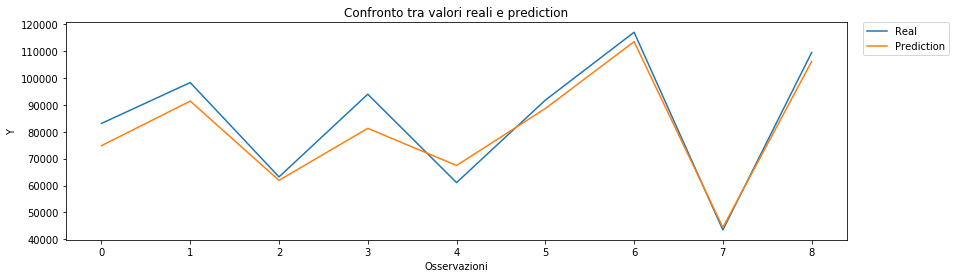

In [8]:
# Calcola l'errore come scostamento delle predizioni dal valore reale
errors = np.abs(test_y - test_y_predicted) 

plt.figure(figsize=(14, 4))
plt.title("Distribuzione degli errori")
plt.hist(x = errors, bins=12)
plt.xlabel('Scostamento da Yn')
plt.ylabel('Osservazioni')
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Confronto tra valori reali e prediction")
plt.plot(test_y, label='Real')
plt.plot(test_y_predicted, label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Osservazioni')
plt.ylabel('Y')
plt.show()

### (d) Implementare allo stesso modo una ridge regression con cross-validation sull’iperparametro. Calcolare il nuovo valore di R2 e il nuovo valore della metrica di qualita' scelta (MSE, RMSE, ecc.)

In [9]:
# ridge regression
ridge = Ridge()

alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
parameters = {'alpha': alphas}

grid_search_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

grid_search_cv.fit(train_x, train_y)

print(f'Best Params: {grid_search_cv.best_params_}')
print(f'Best Score: {grid_search_cv.best_score_:.3f}')

# Best estimator
grid_search_cv = grid_search_cv.best_estimator_

# Predizione
train_y_predicted = grid_search_cv.predict(train_x)
test_y_predicted = grid_search_cv.predict(test_x)

# Calcolo del RMSE
train_rmse = np.sqrt(mean_squared_error(train_y, train_y_predicted))
test_rmse = np.sqrt(mean_squared_error(test_y, test_y_predicted))

print(f'Train RMSE: {train_rmse:.3f}') 
print(f'Test RMSE: {test_rmse:.3f}') 
print(f'R2 score: {grid_search_cv.score(test_x, test_y):.3f}')

Best Params: {'alpha': 1e-05}
Best Score: -35447286.000
Train RMSE: 5493.919
Test RMSE: 6256.134
R2 score: 0.925


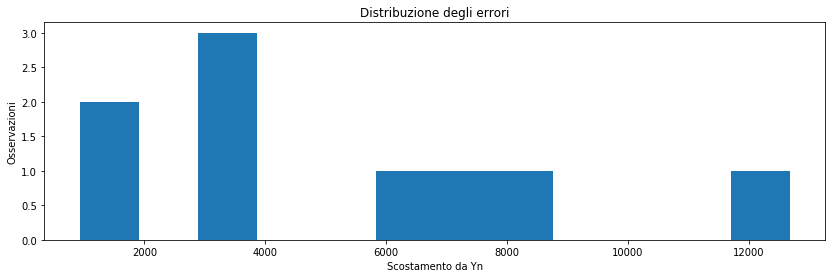

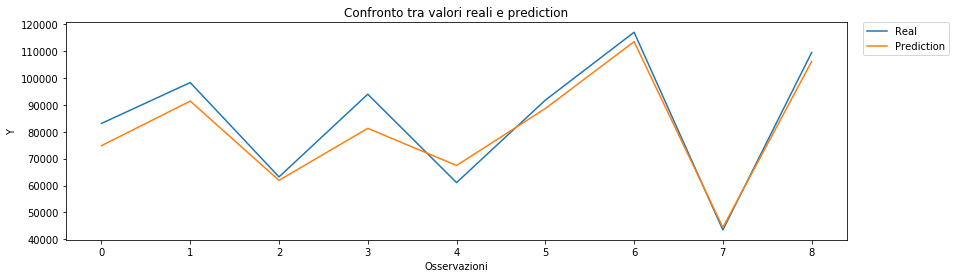

In [10]:
# Calcola l'errore come scostamento delle predizioni dal valore reale
errors = np.abs(test_y - test_y_predicted) 

plt.figure(figsize=(14, 4))
plt.title("Distribuzione degli errori")
plt.hist(x = errors, bins=12)
plt.xlabel('Scostamento da Yn')
plt.ylabel('Osservazioni')
plt.show()

# Visualizza l'andamento reale e quello predetto
plt.figure(figsize=(14, 4))
plt.title("Confronto tra valori reali e prediction")
plt.plot(test_y, label='Real')
plt.plot(test_y_predicted, label='Prediction')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Osservazioni')
plt.ylabel('Y')
plt.show()

# ES2

Generate una funzione di tipo y = x 3 nell’intervallo [−5, 5]. Aggiungete del rumore di tipo Gaussiano (random.normal) con valore medio µ = 0 e deviazione standard σ = 0.2 a questi dati. Questo sara' il vostro dataset.


(a) Fare regressione lineare con modelli di ordine polinomiale dal grado 1 fino al grado 10.

(b) Valutare i risultati ottenuti secondo una qualche metrica di propria scelta (MSE, RMSE, ecc.).

(c) Scegliere un ordine polinomiale tra quelli appena testati e fare regressione ridge per diversi
valori di α.

(d) Scegliere un ordine polinomiale tra quelli appena testati e fare regressione LASSO per diversi
valori di α.

(e) Come si puo' mettere in luce la differenza sostanziale tra la regressione Ridge e quella LASSO? Quali sono i valori piu' interessanti da osservare quando si confrontano questi due regolarizzatori?

### Generate una funzione di tipo y = x 3 nell’intervallo [−5, 5]. Aggiungete del rumore di tipo Gaussiano (random.normal) con valore medio µ = 0 e deviazione standard σ = 0.2 a questi dati. Questo sara' il vostro dataset

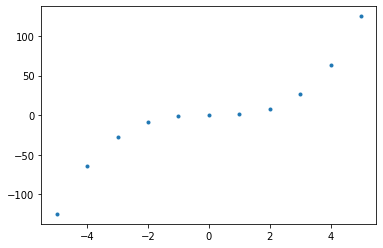

In [11]:
# range dati [-5,5] con step 1
x = np.array([i for i in range(-5, 6, 1)])

# setting seed for reproducability
np.random.seed(10)

# funzione y = x^3
y = x**3

# creating dataframe
df = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

# adding noise
df['y'] = df['y'] + np.random.normal(0, 0.2, len(x))

# plotting
plt.plot(df['x'], df['y'], '.')

### (a) Fare regressione lineare con modelli di ordine polinomiale dal grado 1 fino al grado 10

In [12]:
# crea nuove colonne con potenza da 2 a 10
max_power = 10
for i in range(2, max_power+1): 
    df[f'x_{i}'] = df['x']**i
df

x           y  x_2  x_3  x_4   x_5    x_6    x_7     x_8      x_9     x_10
0  -5 -124.733683   25 -125  625 -3125  15625 -78125  390625 -1953125  9765625
1  -4  -63.856944   16  -64  256 -1024   4096 -16384   65536  -262144  1048576
2  -3  -27.309080    9  -27   81  -243    729  -2187    6561   -19683    59049
3  -2   -8.001677    4   -8   16   -32     64   -128     256     -512     1024
4  -1   -0.875733    1   -1    1    -1      1     -1       1       -1        1
5   0   -0.144017    0    0    0     0      0      0       0        0        0
6   1    1.053102    1    1    1     1      1      1       1        1        1
7   2    8.021710    4    8   16    32     64    128     256      512     1024
8   3   27.000858    9   27   81   243    729   2187    6561    19683    59049
9   4   63.965080   16   64  256  1024   4096  16384   65536   262144  1048576
10  5  125.086605   25  125  625  3125  15625  78125  390625  1953125  9765625

In [13]:
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_{}'.format(i) for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.figure(figsize=(16, 8)) 
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: {}'.format(power))
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    rmse = np.sqrt(mean_squared_error(data['y'], y_pred))
    mse = np.mean((data['y'] - y_pred)**2)
    
    ret = []
    ret.extend([linreg.score(data[predictors],data['y'])])
    ret.extend([mse])
    ret.extend([rmse])
    ret.extend([rss])
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [14]:
def lasso_regression(data, power, models_to_plot, alpha):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_{}'.format(i) for i in range(2,power+1)])
    
    #Fit the model
    reg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    reg.fit(data[predictors],data['y'])
    y_pred = reg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.figure(figsize=(16, 8)) 
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: {}'.format(power))
        
    # return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    rmse = np.sqrt(mean_squared_error(data['y'], y_pred))
    mse = np.mean((data['y'] - y_pred)**2)
    
    ret = []
    ret.extend([reg.score(data[predictors],data['y'])])
    ret.extend([mse])
    ret.extend([rmse])
    ret.extend([rss])
    ret.extend([reg.intercept_])
    ret.extend(reg.coef_)
    return ret

In [15]:
def ridge_regression(data, power, models_to_plot, alpha):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_{}'.format(i) for i in range(2,power+1)])
    
    #Fit the model
    reg = Ridge(alpha=alpha, normalize=True)
    reg.fit(data[predictors],data['y'])
    y_pred = reg.predict(data[predictors])
   
    #Check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.figure(figsize=(16, 8)) 
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: {}'.format(power))
        
    # return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    rmse = np.sqrt(mean_squared_error(data['y'], y_pred))
    mse = np.mean((data['y'] - y_pred)**2)
    
    ret = []    
    ret.extend([reg.score(data[predictors],data['y'])])
    ret.extend([mse])
    ret.extend([rmse])
    ret.extend([rss])
    ret.extend([reg.intercept_])
    ret.extend(reg.coef_)
    return ret

### (b) Valutare i risultati ottenuti secondo una qualche metrica di propria scelta (MSE, RMSE, ecc.).

R2          mse         rmse          rss  intercept  \
model_pow_1   0.849872       559.29      23.6493      6152.19  0.0187474   
model_pow_2   0.849873      559.286      23.6492      6152.14 -0.0508857   
model_pow_3   0.999996    0.0144113     0.120047     0.158524 -0.0508857   
model_pow_4   0.999997    0.0112705     0.106163     0.123975  0.0150596   
model_pow_5   0.999997      0.01127      0.10616     0.123971  0.0150596   
model_pow_6   0.999997    0.0111073     0.105391      0.12218  0.0310371   
model_pow_7   0.999998   0.00669093    0.0817981    0.0736002  0.0310371   
model_pow_8          1   0.00185574    0.0430783    0.0204131 -0.0669021   
model_pow_9          1   0.00157283     0.039659    0.0173012 -0.0669021   
model_pow_10         1  2.09216e-27  4.57401e-14  2.30138e-26  -0.144017   

               coef_x_1    coef_x_2  coef_x_3     coef_x_4     coef_x_5  \
model_pow_1     17.7936         NaN       NaN          NaN          NaN   
model_pow_2     17.7936  0.00696331       NaN          NaN          NaN   
model_pow_3   0.0305312  0.00696331  0.997925          NaN          NaN   
model_pow_4   0.0305312  -0.0159344  0.997925  0.000915907          NaN   
model_pow_5   0.0313766  -0.0159344  0.997784  0.000915907  4.43379e-06   
model_pow_6   0.0313766  -0.0284633  0.997784   0.00229729  4.43379e-06   
model_pow_7  -0.0992397  -0.0284633   1.04367   0.00229729  -0.00385899   
model_pow_8  -0.0992397    0.120605   1.04367   -0.0315563  -0.00385899   
model_pow_9  -0.0448006    0.120605   1.00703   -0.0315563   0.00247977   
model_pow_10 -0.0448006     0.34988   1.00703    -0.133523   0.00247977   

                coef_x_6     coef_x_7     coef_x_8     coef_x_9    coef_x_10  
model_pow_1          NaN          NaN          NaN          NaN          NaN  
model_pow_2          NaN          NaN          NaN          NaN          NaN  
model_pow_3          NaN          NaN          NaN          NaN          NaN  
model_pow_4          NaN          NaN          NaN          NaN          NaN  
model_pow_5          NaN          NaN          NaN          NaN          NaN  
model_pow_6  -3.6615e-05          NaN          NaN          NaN          NaN  
model_pow_7  -3.6615e-05  8.96866e-05          NaN          NaN          NaN  
model_pow_8   0.00232539  8.96866e-05  -4.9622e-05          NaN          NaN  
model_pow_9   0.00232539 -0.000298209  -4.9622e-05  7.57958e-06          NaN  
model_pow_10   0.0172148 -0.000298209 -0.000886034  7.57958e-06  1.55802e-05

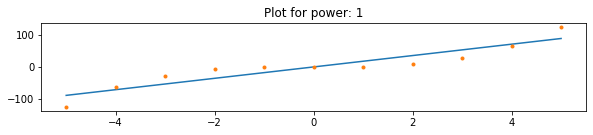

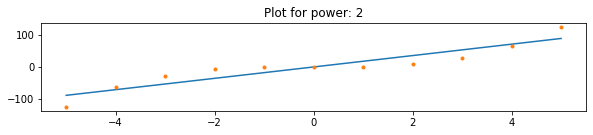

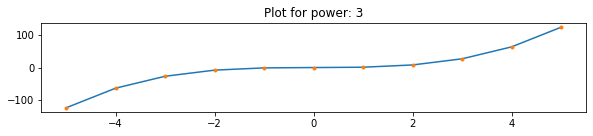

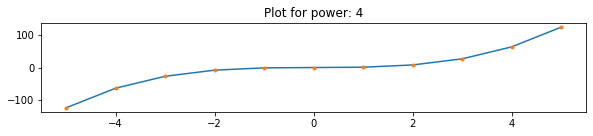

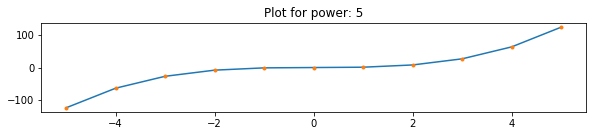

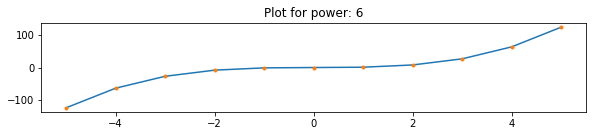

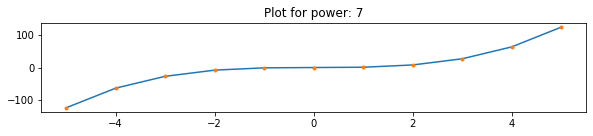

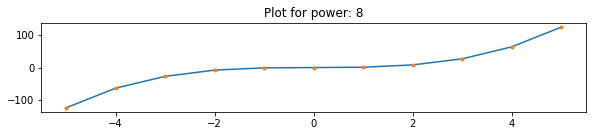

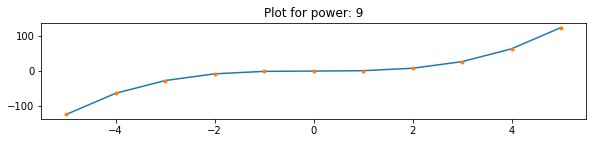

In [16]:
# columns and rows of the dataframe
base_cols = ['R2','mse','rmse','rss','intercept']
coef_cols = ['coef_x_{}'.format(i) for i in range(1, max_power+1)]
ind = ['model_pow_{}'.format(i) for i in range(1, max_power+1)]

# concatenate cols
cols = base_cols + coef_cols

# create dataframe
coef_matrix = pd.DataFrame(index=ind, columns=cols)

#Define the powers for which a plot is required:
models_to_plot = {1:521,2:522,3:523,4:524,5:525,6:526,7:527,8:528,9:529}

#Iterate through all powers and assimilate results
for i in range(1, max_power+1):
    coef_matrix.iloc[i-1,0:i+len(base_cols)] = linear_regression(df, power=i, models_to_plot=models_to_plot)
    
coef_matrix

### (c) Scegliere un ordine polinomiale tra quelli appena testati e fare regressione ridge per diversi valori di α

In [17]:
max_power_to_consider=5

In [18]:
# columns and rows of the dataframe
base_cols = ['R2','mse','rmse','rss','intercept']
coef_cols = [f'coef_x_{i}' for i in range(1, max_power_to_consider+1)]
ind = [f'alpha_{alphas[i]}' for i in range(0, len(alphas))]

# concatenate cols
cols = base_cols + coef_cols

# create dataframe
coef_matrix = pd.DataFrame(index=ind, columns=cols)

for i, alpha in enumerate(alphas):
    coef_matrix.iloc[i,] = ridge_regression(df, power=max_power_to_consider, models_to_plot=[], alpha=alpha)
    
coef_matrix

R2        mse      rmse       rss    intercept   coef_x_1  \
alpha_1e-15   0.999997    0.01127   0.10616  0.123971    0.0150596  0.0313766   
alpha_1e-10   0.999997    0.01127   0.10616  0.123971    0.0150596  0.0313767   
alpha_1e-08   0.999997    0.01127   0.10616  0.123971    0.0150596  0.0313876   
alpha_1e-05   0.999997  0.0113333  0.106458  0.124666    0.0150428  0.0424214   
alpha_0.0001  0.999995  0.0172948   0.13151  0.190243     0.014892   0.139193   
alpha_0.001   0.999892   0.402918  0.634759    4.4321    0.0134241    0.90255   
alpha_0.01    0.998759    4.62415   2.15038   50.8657   0.00194566    3.06604   
alpha_1       0.926812    272.655   16.5123    2999.2   -0.0227873    4.39475   
alpha_5       0.588445    1533.21   39.1562   16865.3  0.000590692    2.24512   
alpha_10      0.389908    2272.84   47.6743   25001.3   0.00814292    1.37842   

                 coef_x_2   coef_x_3     coef_x_4     coef_x_5  
alpha_1e-15    -0.0159344   0.997784  0.000915907  4.43379e-06  
alpha_1e-10    -0.0159344   0.997784  0.000915907  4.43431e-06  
alpha_1e-08    -0.0159344   0.997783  0.000915907   4.4857e-06  
alpha_1e-05    -0.0159289   0.996079  0.000915696  5.61997e-05  
alpha_0.0001   -0.0158801   0.981142  0.000913799  0.000509554  
alpha_0.001    -0.0154046   0.863608  0.000895331   0.00406948  
alpha_0.01     -0.0116694   0.539811  0.000749976    0.0136414  
alpha_1        0.00189717   0.265297  0.000126759    0.0114794  
alpha_5       0.000960331   0.128111   4.8053e-05   0.00547583  
alpha_10      0.000570466  0.0780425  2.75273e-05   0.00332925

### (d) Scegliere un ordine polinomiale tra quelli appena testati e fare regressione LASSO per diversi valori di α

In [19]:
# columns and rows of the dataframe
base_cols = ['R2','mse','rmse','rss','intercept']
coef_cols = [f'coef_x_{i}' for i in range(1, max_power_to_consider+1)]
ind = [f'alpha_{alphas[i]}' for i in range(0, len(alphas))]

# concatenate cols
cols = base_cols + coef_cols

# create dataframe
coef_matrix = pd.DataFrame(index=ind, columns=cols)

for i, alpha in enumerate(alphas):
    coef_matrix.iloc[i,] = lasso_regression(df, power=max_power_to_consider, alpha=alpha, models_to_plot=[])
    
coef_matrix

R2        mse      rmse       rss  intercept  coef_x_1  \
alpha_1e-15   0.999996  0.0151444  0.123062  0.166588  0.0150596  0.119846   
alpha_1e-10   0.999996  0.0151444  0.123062  0.166588  0.0150596  0.119846   
alpha_1e-08   0.999996  0.0151444  0.123062  0.166588  0.0150593  0.119846   
alpha_1e-05   0.999996  0.0151426  0.123055  0.166568  0.0147351   0.11982   
alpha_0.0001  0.999996  0.0151321  0.123012  0.166453  0.0118145   0.11959   
alpha_0.001   0.999996   0.015579  0.124816  0.171369 -0.0173915  0.117291   
alpha_0.01    0.999995  0.0171629  0.131007  0.188792 -0.0131562  0.093643   
alpha_1       0.997042    11.0196   3.31958   121.216  0.0187474         0   
alpha_5       0.926177     275.02   16.5837   3025.22  0.0187474         0   
alpha_10      0.704725    1100.02   33.1665   12100.2  0.0187474         0   

                coef_x_2  coef_x_3     coef_x_4     coef_x_5  
alpha_1e-15   -0.0159344  0.984463  0.000915907  0.000404712  
alpha_1e-10   -0.0159344  0.984463  0.000915907  0.000404712  
alpha_1e-08   -0.0159343  0.984463  0.000915903  0.000404712  
alpha_1e-05    -0.015831  0.984466  0.000911922  0.000404606  
alpha_0.0001  -0.0149004  0.984493  0.000876052  0.000403653  
alpha_0.001  -0.00559502  0.984769  0.000517354  0.000394115  
alpha_0.01             0  0.987628  0.000179234  0.000295788  
alpha_1                0  0.945076            0            0  
alpha_5                0  0.727855            0            0  
alpha_10               0  0.456329            0            0

### (e) Come si puo' mettere in luce la differenza sostanziale tra la regressione Ridge e quella LASSO? Quali sono i valori piu' interessanti da osservare quando si confrontano questi due regolarizzatori?


La regolarizzazione Lasso evidenzia le feature non necessarie ponendo i loro coefficienti a 0

in questo caso se per i valori di alpha (1,5,10) le feature non necessarie sono 4

In [20]:
lasso = coef_matrix.apply(lambda x: sum(x.values==0),axis=1)
lasso

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_1e-05     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      1
alpha_1         4
alpha_5         4
alpha_10        4
dtype: int64

# ES3
Usare il seguente script per generare un dataset sintetico:

```
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.datasets.samples generator import make blobs
X, y true = make blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50
```

C:\Users\aleks\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


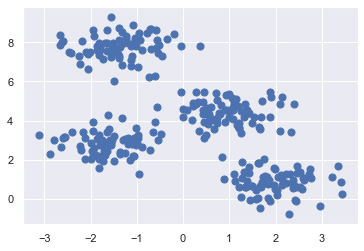

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

### (a) Fare clustering tramite k−Means e commentare i risultati

x         y  cluster            c
0    0.836857  2.136359        0          red
1   -1.413658  7.409623        2         gold
2    1.155213  5.099619        1        coral
3   -1.018616  7.814915        2         gold
4    1.271351  1.892542        0          red
..        ...       ...      ...          ...
295  1.973698  1.579798        0          red
296  2.518342  1.391766        0          red
297  0.438990  4.535929        1        coral
298  0.369479  7.791105        2         gold
299 -1.791458  2.749669        3  yellowgreen

[300 rows x 4 columns]

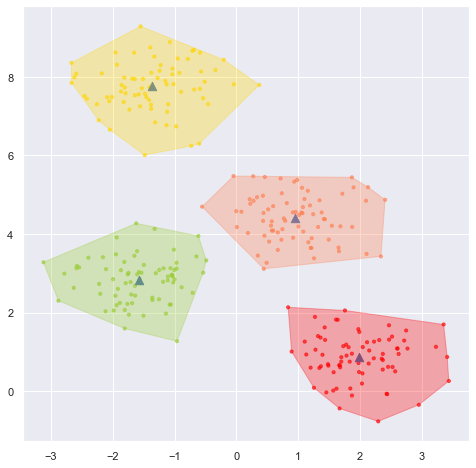

In [22]:
x = X[:,0]
y = X[:,1]

clusters=4  

kmeans = KMeans(n_clusters = clusters, random_state=0)
df = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
all_colors = ["red", "coral", "gold", "yellowgreen", "green", "mediumaquamarine",
              "mediumturquoise", "cornflowerblue", "blue", "purple"]
df['c'] = df['cluster'].apply(lambda x: all_colors[int(x)])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.x, df.y, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', s=70)

for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['x', 'y']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                    points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                    points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=all_colors[i])

df

### Modificare poi i dati in questo modo:

```
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
```

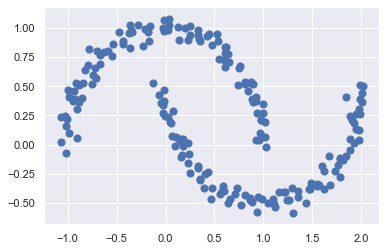

In [23]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Ora k−Means non riesce piu a individuare i due cluster, anche se questi sono visibili a occhio nudo.

x         y  cluster      c
0    0.816805  0.521645        1  coral
1    1.618596 -0.379829        1  coral
2   -0.021270  0.273728        0    red
3   -1.021810 -0.075440        0    red
4    1.766546 -0.170699        1  coral
..        ...       ...      ...    ...
195 -0.536334  0.860268        0    red
196  1.882817  0.244356        1  coral
197  0.175752 -0.007231        0    red
198  0.124236  1.007902        0    red
199  1.621526 -0.223285        1  coral

[200 rows x 4 columns]

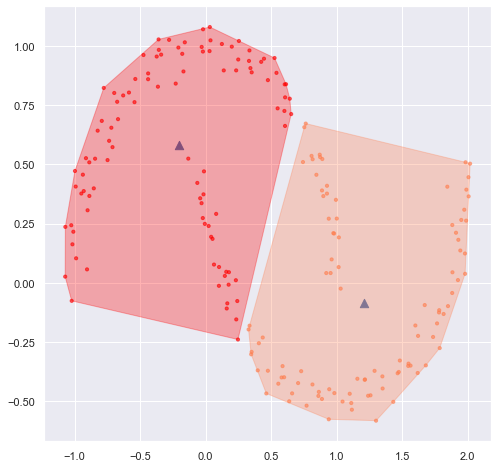

In [24]:
x = X[:,0]
y = X[:,1]

clusters=2  

kmeans = KMeans(n_clusters = clusters, random_state=0)
df = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
all_colors = ["red", "coral", "gold", "yellowgreen", "green", "mediumaquamarine",
              "mediumturquoise", "cornflowerblue", "blue", "purple"]
df['c'] = df['cluster'].apply(lambda x: all_colors[int(x)])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.x, df.y, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', s=70)

for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['x', 'y']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                    points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                    points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=all_colors[i])

df

### (b) Come si puo utilizzare k−Means per fare un clustering che abbia una qualche utilita? Scrivere uno script che tenti di risolvere il problema. (Hint: bisogna sfruttare in qualche modo (vedi slides) il valore di k )

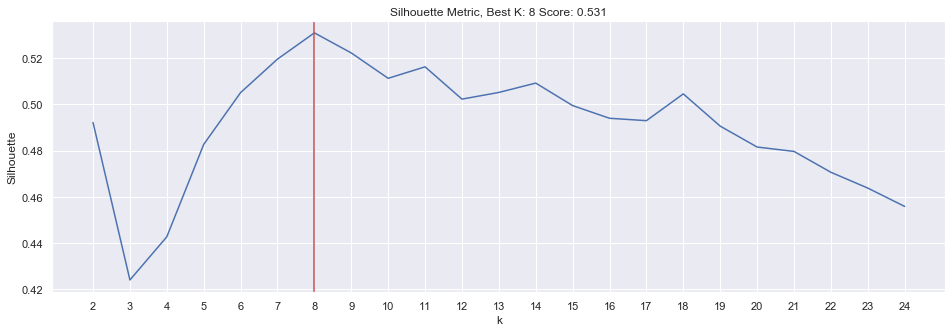

In [25]:
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

df_k = df[['x', 'y', 'cluster']]
for k in k_to_test:
    kmeans_k = KMeans( n_clusters = k )
    kmeans_k.fit(df_k.drop("cluster", axis = 1))
    labels_k = kmeans_k.labels_
    score_k = silhouette_score(df_k.drop("cluster", axis=1), labels_k)
    silhouette_scores[k] = score_k
best_k = max(silhouette_scores, key=silhouette_scores.get)

plt.figure(figsize = (16,5))
plt.plot(list(silhouette_scores.values()))
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title(f'Silhouette Metric, Best K: {best_k} Score: {silhouette_scores[best_k]:.3f}')
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(best_k-2, color = "r")
plt.show()

x         y  cluster                 c
0    0.816805  0.521645        4             green
1    1.618596 -0.379829        7    cornflowerblue
2   -0.021270  0.273728        6   mediumturquoise
3   -1.021810 -0.075440        0               red
4    1.766546 -0.170699        7    cornflowerblue
..        ...       ...      ...               ...
195 -0.536334  0.860268        8              blue
196  1.882817  0.244356        5  mediumaquamarine
197  0.175752 -0.007231        6   mediumturquoise
198  0.124236  1.007902        2              gold
199  1.621526 -0.223285        7    cornflowerblue

[200 rows x 4 columns]

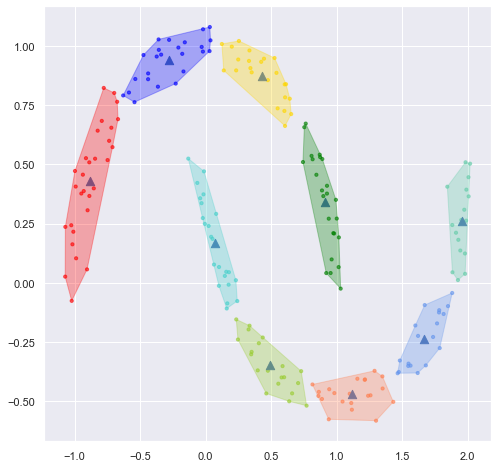

In [26]:
x = X[:,0]
y = X[:,1]

clusters=9  

kmeans = KMeans(n_clusters = clusters, random_state=0)
df = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
df['cluster'] = kmeans.fit_predict(df[['x', 'y']])
all_colors = ["red", "coral", "gold", "yellowgreen", "green", "mediumaquamarine",
              "mediumturquoise", "cornflowerblue", "blue", "purple"]
df['c'] = df['cluster'].apply(lambda x: all_colors[int(x)])

# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

fig, ax = plt.subplots(1, figsize=(8,8))
plt.scatter(df.x, df.y, c=df.c, alpha = 0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', s=70)

for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['x', 'y']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                    points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                    points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=all_colors[i])

df

# ES4

Task I.4. [30 punti] Usare il seguente script per generare un dataset sintetico:

```
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model selection_as_ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1
```

Si richiede di:

(a) Classificare i dati (l’array y contiene solo due possibili valori, cioe le classi) con SVM lineare.

(b) Classificare i dati con Logistic Regression.

(c) Classificare i dati con kNN (scegliere k come si ritiene migliore).

(d) Argomentare quale classificatore ha funzionato meglio.


x1        x2      y
0    1.203037  1.236205   True
1    2.465325  1.383232   True
2    0.346233  1.022516   True
3    0.166810  1.656717   True
4    0.667890 -0.229947  False
..        ...       ...    ...
195 -0.665766 -0.704620  False
196 -0.353763  0.151927  False
197 -0.304200 -1.178854  False
198 -0.149133 -0.225097  False
199  0.070154  0.452067  False

[200 rows x 3 columns]

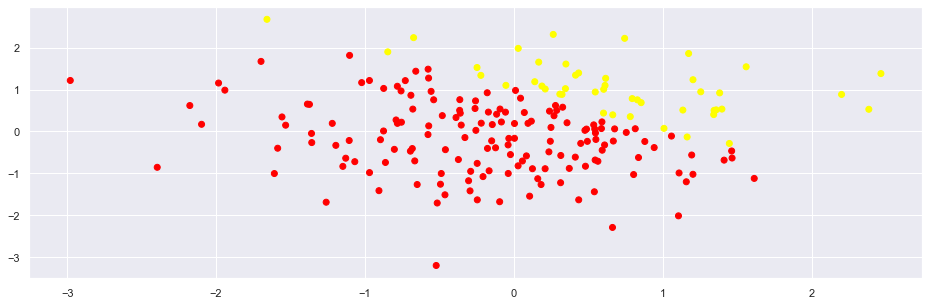

In [27]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

plt.figure(figsize = (16,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn');
df = pd.DataFrame(X, columns=['x1','x2'])
df['y'] = y
df

In [28]:
def plot_confusion_matrix(y_real, y_pred):
    cmat = confusion_matrix(y_real, y_pred)
    fig, ax = plt.subplots()
    sns.heatmap(pd.DataFrame(cmat), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print(f'TP - True Negative: {cmat[0,0]}')
    print(f'FP - False Positive: {cmat[0,1]}')
    print(f'FN - False Negative: {cmat[1,0]}')
    print(f'TP - True Positive: {cmat[1,1]}')
    print(f'Accuracy Rate: {np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)):.3f}')
    print(f'Misclassification Rate: {np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat)):.3f}')

In [29]:
def plot_roc_curve(y_real, y_pred):
    fpr, tpr, _ = metrics.roc_curve(y_real,  y_pred)
    auc = metrics.roc_auc_score(y_real, y_pred)

    fig = px.area(
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc:.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

In [30]:
def plot_error_rate(errors):
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 40), errors, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')   

### (a) Classificare i dati (l’array y contiene solo due possibili valori, cioe le classi) con SVM lineare.

TP - True Negative: 45
FP - False Positive: 2
FN - False Negative: 0
TP - True Positive: 13
Accuracy Rate: 0.967
Misclassification Rate: 0.033


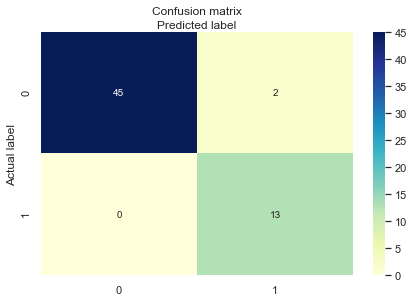

In [31]:
from sklearn.model_selection import train_test_split
test_portion = 0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_portion,random_state=0)

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# display confusion matrix for best prediction
plot_confusion_matrix(y_test, y_pred)
# display ROC curve for best prediction
plot_roc_curve(y_test, y_pred)

### (b) Classificare i dati con Logistic Regression.

TP - True Negative: 45
FP - False Positive: 2
FN - False Negative: 0
TP - True Positive: 13
Accuracy Rate: 0.967
Misclassification Rate: 0.033


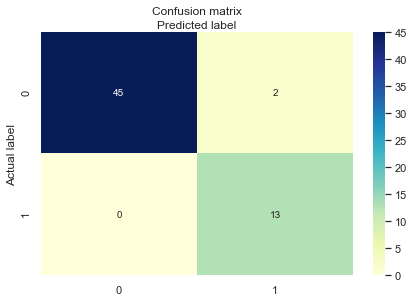

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e12, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# display confusion matrix for best prediction
plot_confusion_matrix(y_test, y_pred)
# display ROC curve for best prediction
plot_roc_curve(y_test, y_pred)

### (c) Classificare i dati con kNN (scegliere k come si ritiene migliore).

Best prediction with K=1
TP - True Negative: 46
FP - False Positive: 1
FN - False Negative: 2
TP - True Positive: 11
Accuracy Rate: 0.950
Misclassification Rate: 0.050


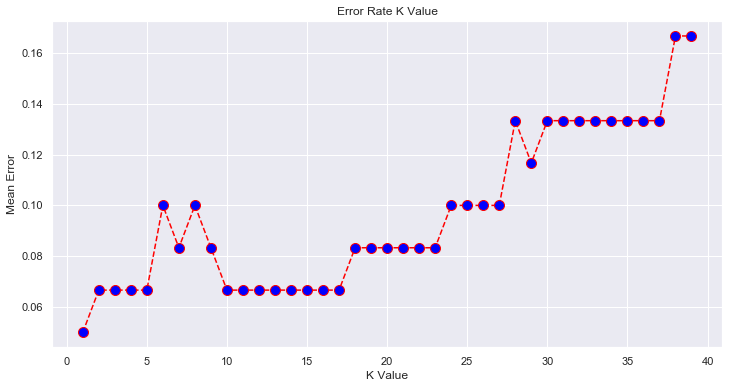

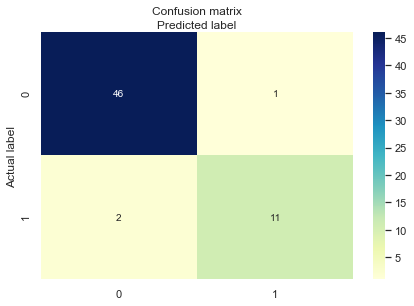

In [33]:
from sklearn.neighbors import KNeighborsClassifier

errors = []
predictions = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions.append(knn.predict(X_test))
    errors.append(np.mean(predictions[i-1] != y_test))
    
# plot error rate
plot_error_rate(errors)

idx_best = errors.index(min(errors))
best_prediction = predictions[idx_best]
print(f"Best prediction with K={idx_best + 1}")

# display confusion matrix for best prediction
plot_confusion_matrix(y_test, best_prediction)
# display ROC curve for best prediction
plot_roc_curve(y_test, best_prediction)

### (d) Argomentare quale classificatore ha funzionato meglio

Il migliore è SVC lineare

Modificare poi i dati in questo modo:
```
y = np.logical xor(X[:, 0] > 0, X[:, 1] > 0)
```
Ora le due classi sono non separabili linearmente, ma un classificatore nonlineare potrebbe riuscire
a risolvere il task. Si richiede di:

In [34]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

### (e) Classificare i dati con SVM nonlineare (kernel RBF, quello di default, `e sufficiente)


TP - True Negative: 29
FP - False Positive: 1
FN - False Negative: 2
TP - True Positive: 28
Accuracy Rate: 0.950
Misclassification Rate: 0.050


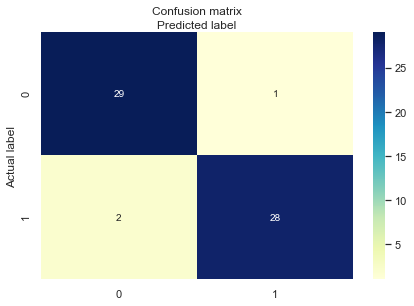

In [35]:
from sklearn.model_selection import train_test_split
test_portion = 0.3
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=test_portion,random_state=0)

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', class_weight='balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# display confusion matrix for best prediction
plot_confusion_matrix(y_test, y_pred)
# display ROC curve for best prediction
plot_roc_curve(y_test, y_pred)

### (f) Provare a classificare i dati con kNN (scegliere k come si preferisce).

Best prediction with K=14
TP - True Negative: 30
FP - False Positive: 0
FN - False Negative: 2
TP - True Positive: 28
Accuracy Rate: 0.967
Misclassification Rate: 0.033


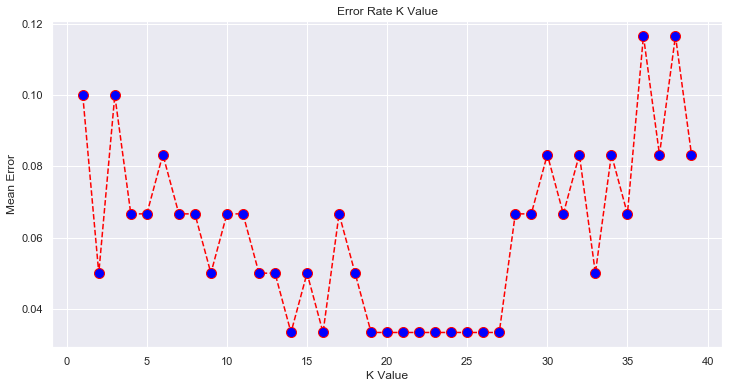

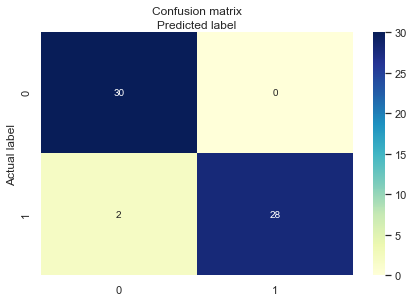

In [36]:
from sklearn.neighbors import KNeighborsClassifier

errors = []
predictions = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions.append(knn.predict(X_test))
    errors.append(np.mean(predictions[i-1] != y_test))
    
# plot error rate
plot_error_rate(errors)

idx_best = errors.index(min(errors))
best_prediction = predictions[idx_best]
print(f"Best prediction with K={idx_best + 1}")

# display confusion matrix for best prediction
plot_confusion_matrix(y_test, best_prediction)
# display ROC curve for best prediction
plot_roc_curve(y_test, best_prediction)

### (g) Argomentare quale classificatore ha funzionato meglio.

KNN con K=14 funziona meglio

### (h) Bonus Classificare i dati con Logistic Regression di ordine superiore al primo.
